## EXAMPLE 1

In [1]:
install.packages("MASS")
install.packages("glmnet")
library(MASS)
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘foreach’, ‘shape’, ‘Rcpp’, ‘RcppEigen’


Loading required package: Matrix

Loaded glmnet 4.1-7



In [2]:
# Generate data
set.seed(19875)
n = 1000; p = 5000; real_p = 15
x = matrix(rnorm(n * p), nrow = n, ncol = p)
y = apply(x[, 1:real_p], 1, sum) + rnorm(n)

In [3]:
# Split data into train (2/3) and test(1/3) sets
train_rows = sample(1:n, .66*n)
x.train = x[train_rows, ]
x.test = x[-train_rows, ]
y.train = y[train_rows]
y.test = y[-train_rows]

In [4]:
# Fit models
fit.lasso = glmnet(x.train, y.train, family = "gaussian", alpha = 1)
fit.ridge = glmnet(x.train, y.train, family = "gaussian", alpha = 0)
fit.elnet = glmnet(x.train, y.train, family = "gaussian", alpha = .5)

In [5]:
# 10-fold cross validation
for (i in 0:10){
  assign(paste("fit", i, sep = ""), cv.glmnet(x.train, y.train, type.measure = "mse",
                                              alpha = i/10, family = "gaussian"))
}

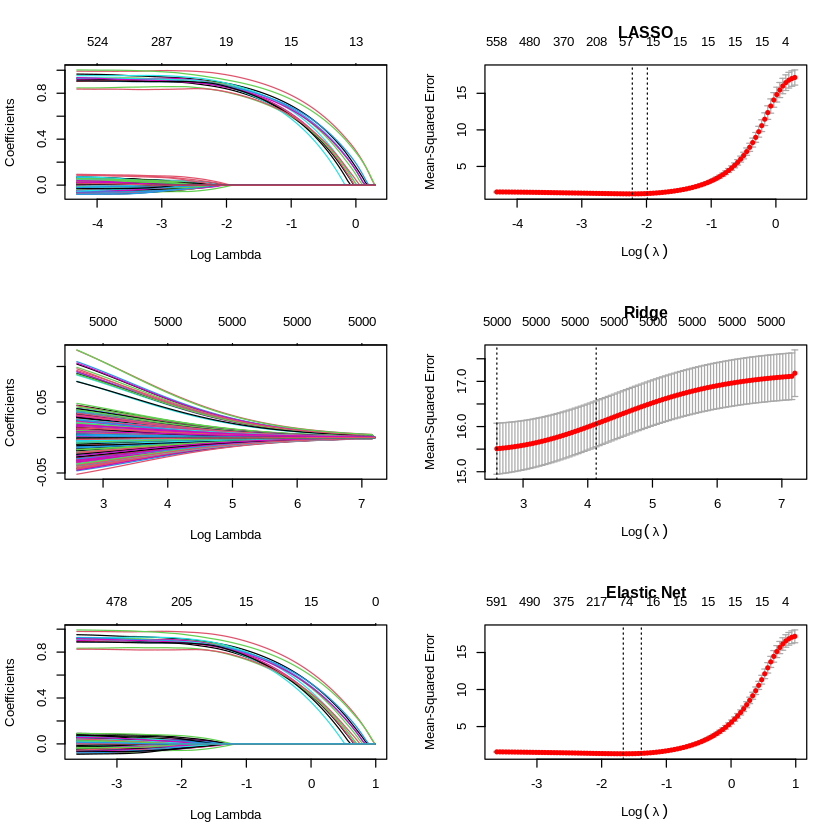

In [6]:
# plot solution paths
par(mfrow = c(3, 2))
plot(fit.lasso, xvar = "lambda")
plot(fit10, main = "LASSO")
plot(fit.ridge, xvar = "lambda")
plot(fit0, main = "Ridge")
plot(fit.elnet, xvar = "lambda")
plot(fit5, main = "Elastic Net")

In [7]:
# MSE on test set
yhat0 = predict(fit0, s = fit0$lambda.1se, newx = x.test)
yhat1 = predict(fit1, s = fit1$lambda.1se, newx = x.test)
yhat2 = predict(fit2, s = fit2$lambda.1se, newx = x.test)
yhat3 = predict(fit3, s = fit3$lambda.1se, newx = x.test)
yhat4 = predict(fit4, s = fit4$lambda.1se, newx = x.test)
yhat5 = predict(fit5, s = fit5$lambda.1se, newx = x.test)
yhat6 = predict(fit6, s = fit6$lambda.1se, newx = x.test)
yhat7 = predict(fit7, s = fit7$lambda.1se, newx = x.test)
yhat8 = predict(fit8, s = fit8$lambda.1se, newx = x.test)
yhat9 = predict(fit9, s = fit9$lambda.1se, newx = x.test)
yhat10 = predict(fit10, s = fit10$lambda.1se, newx = x.test)

mse0 = mean((y.test - yhat0)^2)
mse1 = mean((y.test - yhat1)^2)
mse2 = mean((y.test - yhat2)^2)
mse3 = mean((y.test - yhat3)^2)
mse4 = mean((y.test - yhat4)^2)
mse5 = mean((y.test - yhat5)^2)
mse6 = mean((y.test - yhat6)^2)
mse7 = mean((y.test - yhat7)^2)
mse8 = mean((y.test - yhat8)^2)
mse9 = mean((y.test - yhat9)^2)
mse10 = mean((y.test - yhat10)^2)

$\rightarrow$ Lasso(mse10; alpha = 1) is the winner

## EXAMPLE 2

In [8]:
library(MASS)
library(glmnet)

In [9]:
# Generate data
set.seed(19874)
n = 1000; p = 5000; real_p = 1500
x = matrix(rnorm(n * p), nrow = n, ncol = p)
y = apply(x[, 1:real_p], 1, sum) + rnorm(n)

In [10]:
# Split data into train (2/3) and test(1/3) sets
train_rows = sample(1:n, .66*n)
x.train = x[train_rows, ]
x.test = x[-train_rows, ]
y.train = y[train_rows]
y.test = y[-train_rows]

In [11]:
# Fit models
fit.lasso = glmnet(x.train, y.train, family = "gaussian", alpha = 1)
fit.ridge = glmnet(x.train, y.train, family = "gaussian", alpha = 0)
fit.elnet = glmnet(x.train, y.train, family = "gaussian", alpha = .5)

In [12]:
# 10-fold cross validation
fit.lasso.cv = cv.glmnet(x.train, y.train, type.measure = "mse", alphs = 1, family = "gaussian")
fit.ridge.cv = cv.glmnet(x.train, y.train, type.measure = "mse", alphs = 0, family = "gaussian")
fit.elnet.cv = cv.glmnet(x.train, y.train, type.measure = "mse", alphs = .5, family = "gaussian")

for (i in 0:10){
  assign(paste("fit", i, sep = ""), cv.glmnet(x.train, y.train, type.measure = "mse",
                                              alpha = i/10, family = "gaussian"))
}

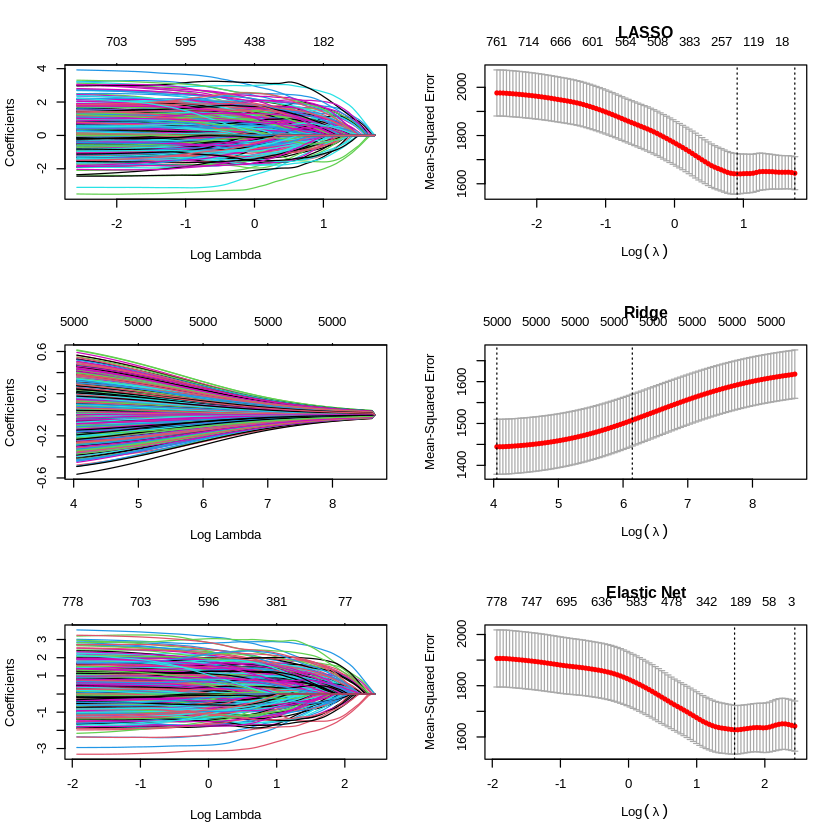

In [13]:
# plot solution paths
par(mfrow = c(3, 2))
plot(fit.lasso, xvar = "lambda")
plot(fit10, main = "LASSO")
plot(fit.ridge, xvar = "lambda")
plot(fit0, main = "Ridge")
plot(fit.elnet, xvar = "lambda")
plot(fit5, main = "Elastic Net")

In [14]:
# MSE on test set
yhat0 = predict(fit0, s = fit0$lambda.1se, newx = x.test)
yhat1 = predict(fit1, s = fit1$lambda.1se, newx = x.test)
yhat2 = predict(fit2, s = fit2$lambda.1se, newx = x.test)
yhat3 = predict(fit3, s = fit3$lambda.1se, newx = x.test)
yhat4 = predict(fit4, s = fit4$lambda.1se, newx = x.test)
yhat5 = predict(fit5, s = fit5$lambda.1se, newx = x.test)
yhat6 = predict(fit6, s = fit6$lambda.1se, newx = x.test)
yhat7 = predict(fit7, s = fit7$lambda.1se, newx = x.test)
yhat8 = predict(fit8, s = fit8$lambda.1se, newx = x.test)
yhat9 = predict(fit9, s = fit9$lambda.1se, newx = x.test)
yhat10 = predict(fit10, s = fit10$lambda.1se, newx = x.test)

mse0 = mean((y.test - yhat0)^2)
mse1 = mean((y.test - yhat1)^2)
mse2 = mean((y.test - yhat2)^2)
mse3 = mean((y.test - yhat3)^2)
mse4 = mean((y.test - yhat4)^2)
mse5 = mean((y.test - yhat5)^2)
mse6 = mean((y.test - yhat6)^2)
mse7 = mean((y.test - yhat7)^2)
mse8 = mean((y.test - yhat8)^2)
mse9 = mean((y.test - yhat9)^2)
mse10 = mean((y.test - yhat10)^2)

## ANOTHER example -- 과제(22.05.10)

In [15]:
install.packages("tidyverse")
install.packages("caret")
library(tidyverse)
library(caret)
library(glmnet)
data("Boston", package = "MASS")
set.seed(1212)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘ragg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ dplyr

In [16]:
# split the data into training and test data
sample_size = floor(0.75 * nrow(Boston))
training_index = sample(seq_len(nrow(Boston)), size = sample_size)
train = Boston[training_index, ]
test = Boston[-training_index, ]

In [17]:
# predictor
x = model.matrix(medv ~ ., train)[, -1]
# response
y = train$medv

In [18]:
cor(x)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.0000000,-0.19783803,0.4048218,-0.0558512016,0.4154495,-0.21266716,0.3402366,-0.3759981,0.6068882911,0.57034124,0.2843745,-0.36340496,0.43380392
zn,-0.1978380,1.00000000,-0.5364756,-0.0937913057,-0.5175894,0.30475585,-0.5617201,0.6585557,-0.3166896525,-0.30865225,-0.3925595,0.17784709,-0.40257336
indus,0.4048218,-0.53647562,1.0000000,0.1036112385,0.7503757,-0.41405036,0.6293908,-0.7029460,0.6121296332,0.70895253,0.3963665,-0.36925050,0.60523346
chas,-0.0558512,-0.09379131,0.1036112,1.0000000000,0.1492366,0.09275257,0.1310629,-0.1293515,-0.0005363807,-0.01658895,-0.1480540,0.04281837,-0.04835763
nox,0.4154495,-0.51758935,0.7503757,0.1492365889,1.0000000,-0.30565646,0.7293679,-0.7772588,0.6033194165,0.65100648,0.1828466,-0.39224026,0.58959651
rm,-0.2126672,0.30475585,-0.4140504,0.0927525717,-0.3056565,1.00000000,-0.2327486,0.2004876,-0.2348236249,-0.31075477,-0.3686648,0.12564993,-0.61220130
age,0.3402366,-0.56172014,0.6293908,0.1310628648,0.7293679,-0.23274861,1.0000000,-0.7479941,0.4481751252,0.48319366,0.2633879,-0.27103272,0.58260666
dis,-0.3759981,0.65855573,-0.7029460,-0.1293515471,-0.7772588,0.20048762,-0.7479941,1.0000000,-0.4995172441,-0.52924788,-0.2152992,0.29771321,-0.48747726
rad,0.6068883,-0.31668965,0.6121296,-0.0005363807,0.6033194,-0.23482362,0.4481751,-0.4995172,1.0000000000,0.91769859,0.4617790,-0.42317607,0.47537502
tax,0.5703412,-0.30865225,0.7089525,-0.0165889476,0.6510065,-0.31075477,0.4831937,-0.5292479,0.9176985922,1.00000000,0.4572240,-0.43284856,0.52886302


In [19]:
ols = lm(y ~ x)
summary(ols)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0792  -2.7447  -0.7458   1.7797  25.6606 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  36.218030   5.941841   6.095 2.78e-09 ***
xcrim        -0.128090   0.035334  -3.625  0.00033 ***
xzn           0.050606   0.015874   3.188  0.00156 ** 
xindus        0.007802   0.070943   0.110  0.91249    
xchas         1.843904   1.022293   1.804  0.07210 .  
xnox        -18.140467   4.578978  -3.962 8.95e-05 ***
xrm           3.793937   0.477403   7.947 2.40e-14 ***
xage          0.010779   0.015317   0.704  0.48207    
xdis         -1.432556   0.239346  -5.985 5.16e-09 ***
xrad          0.355819   0.078167   4.552 7.25e-06 ***
xtax         -0.013081   0.004396  -2.976  0.00312 ** 
xptratio     -0.989682   0.153246  -6.458 3.39e-10 ***
xblack        0.010301   0.003127   3.294  0.00108 ** 
xlstat       -0.513861   0.056844  -9.040  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0

In [20]:
# Fit Ridge model, CV
model.ridge0 = glmnet(x, y, alpha = 0)
coef(model.ridge0)

  [[ suppressing 100 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



14 x 100 sparse Matrix of class "dgCMatrix"
                                                                   
(Intercept)  2.260132e+01  2.264128e+01  2.264511e+01  2.264931e+01
crim        -3.921516e-37 -5.810147e-04 -6.371184e-04 -6.985836e-04
zn           1.419944e-37  2.102225e-04  2.305050e-04  2.527225e-04
indus       -6.723845e-37 -9.953700e-04 -1.091395e-03 -1.196579e-03
chas         5.444523e-36  8.125747e-03  8.916706e-03  9.784512e-03
nox         -3.439930e-35 -5.087547e-02 -5.577845e-02 -6.114798e-02
rm           9.090972e-36  1.352212e-02  1.483351e-02  1.627134e-02
age         -1.160430e-37 -1.714816e-04 -1.879926e-04 -2.060715e-04
dis          1.071918e-36  1.575718e-03  1.726547e-03  1.891517e-03
rad         -3.933422e-37 -5.811081e-04 -6.370437e-04 -6.982875e-04
tax         -2.514614e-38 -3.721073e-05 -4.079905e-05 -4.472921e-05
ptratio     -2.190543e-36 -3.253622e-03 -3.568669e-03 -3.913993e-03
black        3.311080e-38  4.907558e-05  5.381650e-05  5.901078e-05
lsta

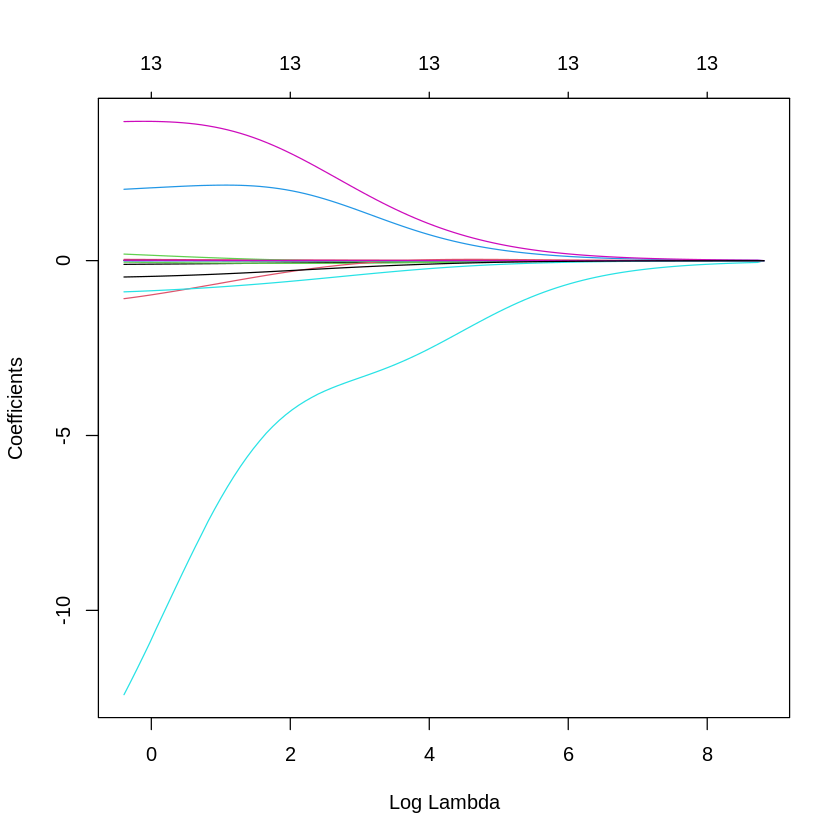

In [21]:
plot(model.ridge0, xvar = "lambda")

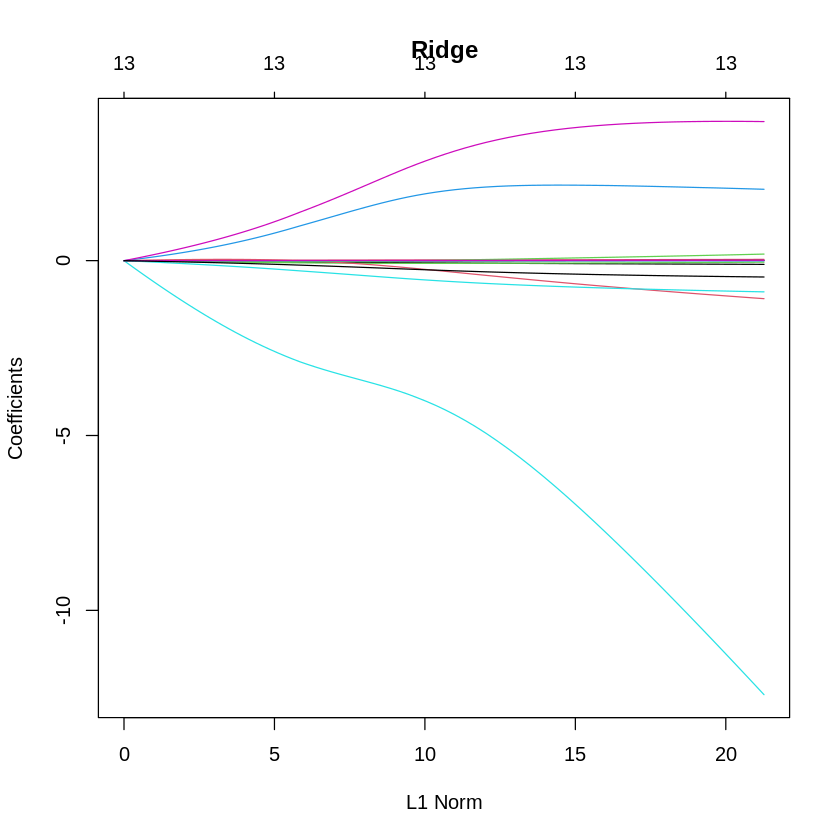

In [22]:
plot(model.ridge0, main = "Ridge")

In [23]:
cv.r = cv.glmnet(x, y, alpha = 0)
cv.r$lambda.min

[1] 0.67491

In [24]:
model.ridge = glmnet(x, y, alpha = 0, lambda = cv.r$lambda.min)
coef(model.ridge)

14 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  27.963322275
crim         -0.106405350
zn            0.036603326
indus        -0.043366437
chas          2.046377761
nox         -12.505400699
rm            3.979540748
age           0.005269931
dis          -1.089551453
rad           0.188215315
tax          -0.005731069
ptratio      -0.893093339
black         0.010048315
lstat        -0.466659459

In [25]:
# test data
x.test.ridge = model.matrix(medv ~ ., test)[, -1]
predictions.ridge = model.ridge %>% predict(x.test.ridge) %>% as.vector()
data.frame(
  RMSE.r = RMSE(predictions.ridge, test$medv),
  Rsquare.r = R2(predictions.ridge, test$medv))

RMSE.r,Rsquare.r
<dbl>,<dbl>
4.539269,0.7456319


In [26]:
# Fit Lasso regression model, CV
model.lasso0 = glmnet(x, y, alpha = 1)
coef(model.lasso0)

  [[ suppressing 75 column names ‘s0’, ‘s1’, ‘s2’ ... ]]



14 x 75 sparse Matrix of class "dgCMatrix"
                                                                            
(Intercept) 22.60132 23.64433493 21.7113506 19.5622566 17.6036793 15.8190962
crim         .        .           .          .          .          .        
zn           .        .           .          .          .          .        
indus        .        .           .          .          .          .        
chas         .        .           .          .          .          .        
nox          .        .           .          .          .          .        
rm           .        .           0.4094099  0.8375176  1.2276506  1.5831254
age          .        .           .          .          .          .        
dis          .        .           .          .          .          .        
rad          .        .           .          .          .          .        
tax          .        .           .          .          .          .        
ptratio      .        .          

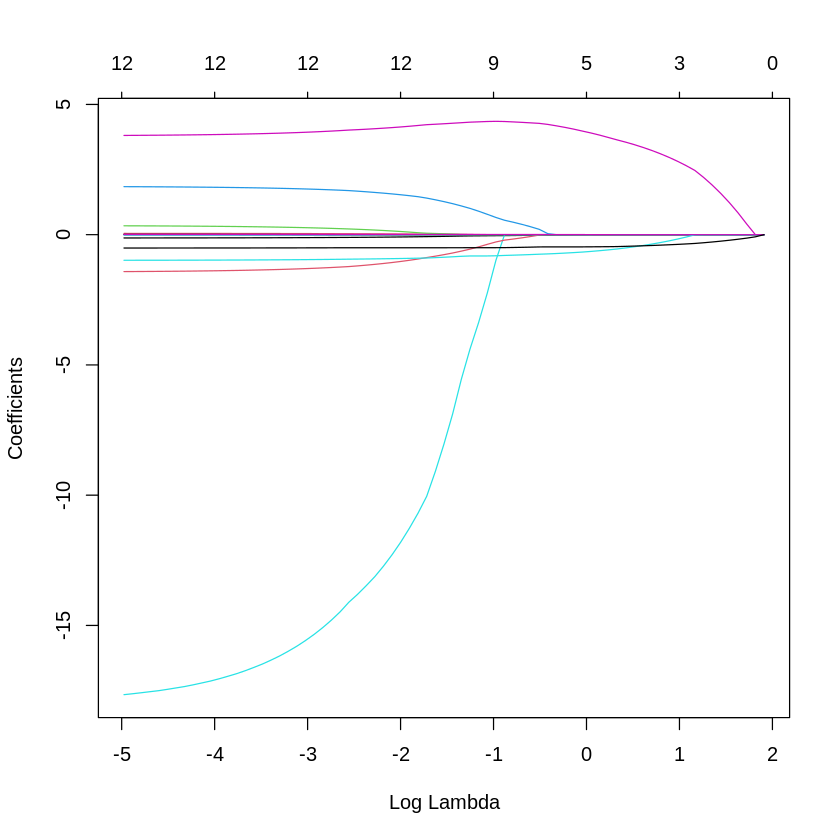

In [27]:
plot(model.lasso0, xvar = "lambda")

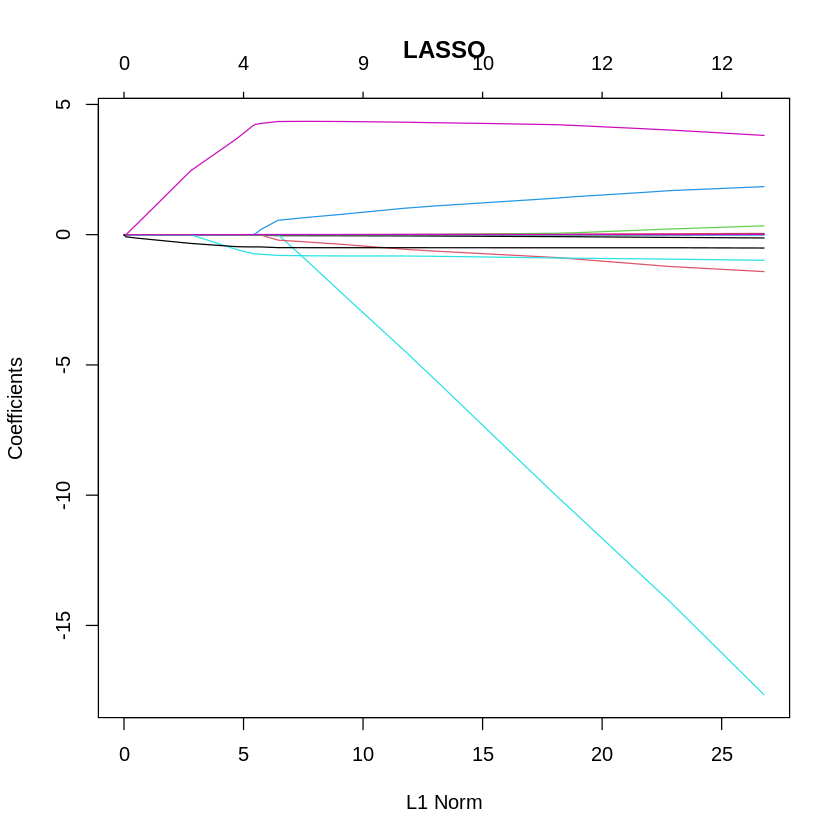

In [28]:
plot(model.lasso0, main = "LASSO")

In [29]:
cv.l = cv.glmnet(x, y, alpha = 1)
cv.l$lambda.min

[1] 0.01454049

In [30]:
model.lasso = glmnet(x, y, alpha = 1, lambda = cv.l$lambda.min)
coef(model.lasso)

14 x 1 sparse Matrix of class "dgCMatrix"
                       s0
(Intercept)  35.151683983
crim         -0.123764815
zn            0.047935668
indus         .          
chas          1.827721571
nox         -17.299162360
rm            3.831222782
age           0.008744209
dis          -1.398760177
rad           0.327841780
tax          -0.011776417
ptratio      -0.978059096
black         0.010209385
lstat        -0.511124733

In [31]:
# test data
x.test.lasso = model.matrix(medv ~ ., test)[, -1]
predictions.lasso = model.lasso %>% predict(x.test.lasso) %>% as.vector()
data.frame(
  RMSE.l = RMSE(predictions.lasso, test$medv),
  Rsquare.l = R2(predictions.lasso, test$medv))

RMSE.l,Rsquare.l
<dbl>,<dbl>
4.518202,0.743524


In [32]:
# Fit Elastic Net model, CV
model.net = train(
  medv ~ ., data = train, method = "glmnet",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10)
model.net$bestTune
coef(model.net$finalModel, model.net$bestTune$lambda)

,alpha,lambda
,<dbl>,<dbl>
5,0.1,0.08880914


14 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept)  34.110267263
crim         -0.121604712
zn            0.046443925
indus        -0.004986206
chas          1.867489216
nox         -16.741589656
rm            3.860396719
age           0.008595017
dis          -1.357521045
rad           0.305364776
tax          -0.010718221
ptratio      -0.968630739
black         0.010239902
lstat        -0.506042548

In [33]:
# test data
x.test.net = model.matrix(medv ~ ., test)[, -1]
predictions.net = model.net %>% predict(x.test.net)
data.frame(
  RMSE.net = RMSE(predictions.net, test$medv),
  Rsquare.net = R2(predictions.net, test$medv))

RMSE.net,Rsquare.net
<dbl>,<dbl>
4.515913,0.7442081
